In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torchtext.data as ttd
from torchtext.vocab import GloVe

from datetime import datetime

In [91]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

--2020-12-17 11:22:57--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.80.48, 104.31.81.48, 172.67.213.166, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.80.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.006s  

2020-12-17 11:22:57 (81.8 MB/s) - ‘spam.csv’ saved [503663/503663]



In [92]:
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")

In [93]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [94]:
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

In [95]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [96]:
df.rename(mapper={"v1": "label", "v2": "data"}, axis=1, inplace=True)

In [97]:
df.head()

,label,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [98]:
df["b_labels"] = df.label.map({"ham": 0, "spam": 1})

In [99]:
df.head()

,label,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [100]:
df2 = df[["data", "b_labels"]]

In [101]:
df2.head()

,data,b_labels
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [102]:
df2.to_csv("spam2.csv", index=False)

In [105]:
df2.head()

,data,b_labels
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [103]:
!head spam2.csv

data,b_labels
"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",0
Ok lar... Joking wif u oni...,0
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,1
U dun say so early hor... U c already then say...,0
"Nah I don't think he goes to usf, he lives around here though",0
"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",1
Even my brother is not like to speak with me. They treat me like aids patent.,0
As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,0
WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.,1


In [162]:
TEXT = ttd.Field(sequential=True,                   
                 lower=False, 
                 batch_first=True,
                 tokenize="spacy",
                 pad_first=True)
LABEL = ttd.Field(sequential=False, 
                  use_vocab=False,
                  is_target=True)

In [163]:
dataset = ttd.TabularDataset(path="spam2.csv",
                             format="csv", 
                             fields=[("data", TEXT), ("b_labels", LABEL)],
                             skip_header=True)

In [164]:
train_dataset, test_dataset = dataset.split()

In [165]:
TEXT.build_vocab(train_dataset,)

In [166]:
vocab = TEXT.vocab

In [167]:
vocab.stoi

defaultdict(<function torchtext.vocab._default_unk_index>,
            {'<unk>': 0,
             '<pad>': 1,
             '.': 2,
             'to': 3,
             'I': 4,
             ',': 5,
             'you': 6,
             '?': 7,
             'a': 8,
             '!': 9,
             'the': 10,
             '...': 11,
             'i': 12,
             'in': 13,
             'is': 14,
             'and': 15,
             'u': 16,
             'me': 17,
             '..': 18,
             'for': 19,
             'it': 20,
             'my': 21,
             'of': 22,
             'your': 23,
             'on': 24,
             'do': 25,
             'have': 26,
             '&': 27,
             '2': 28,
             "'s": 29,
             'that': 30,
             ' ': 31,
             'now': 32,
             'call': 33,
             'not': 34,
             'are': 35,
             ':': 36,
             ';': 37,
             "'m": 38,
             'at': 39,
             'be': 40,

In [168]:
vocab.itos

['<unk>',
 '<pad>',
 '.',
 'to',
 'I',
 ',',
 'you',
 '?',
 'a',
 '!',
 'the',
 '...',
 'i',
 'in',
 'is',
 'and',
 'u',
 'me',
 '..',
 'for',
 'it',
 'my',
 'of',
 'your',
 'on',
 'do',
 'have',
 '&',
 '2',
 "'s",
 'that',
 ' ',
 'now',
 'call',
 'not',
 'are',
 ':',
 ';',
 "'m",
 'at',
 'be',
 'or',
 'with',
 "n't",
 'U',
 'will',
 'get',
 'nt',
 'so',
 'ur',
 'but',
 'can',
 '*',
 '4',
 'You',
 '-',
 'up',
 ')',
 'we',
 '/',
 'out',
 'know',
 'just',
 'lt;#&gt',
 'from',
 'this',
 'was',
 '"',
 'if',
 'like',
 'when',
 'got',
 'all',
 'come',
 'go',
 'there',
 "'ll",
 'then',
 'am',
 'No',
 'Do',
 'day',
 'time',
 'about',
 'he',
 'what',
 'by',
 'only',
 'want',
 'How',
 'home',
 'lor',
 'Ok',
 'need',
 'Call',
 'one',
 'good',
 'back',
 'send',
 'We',
 'how',
 'still',
 'text',
 'If',
 'love',
 'no',
 'its',
 '_',
 'going',
 'did',
 'as',
 'But',
 'mobile',
 'n',
 'da',
 'later',
 'today',
 'ok',
 'see',
 'Ì',
 'Just',
 'her',
 'r',
 'been',
 'has',
 'FREE',
 'So',
 'any',
 'free'

In [169]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [170]:
train_iter, test_iter = ttd.Iterator.splits(
        (train_dataset, test_dataset), sort_key=lambda x: len(x.data),
        batch_sizes=(32, 256), device=device)

In [171]:
for inputs, targets in train_iter:
  print("inputs: ", inputs, "shape: ", inputs.shape)
  print("targets: ", targets, "shape: ", targets.shape)
  break

inputs:  tensor([[   1,    1,    1,  ...,   66,  821, 1671],
        [   1,    1,    1,  ...,  845, 4456,    2],
        [   1,    1,    1,  ..., 1529,  449, 2622],
        ...,
        [   1,    1,    1,  ...,   15,  319,  571],
        [   1,    1,    1,  ...,   93,  276, 1222],
        [   1,    1,    1,  ...,  602, 1337,   18]], device='cuda:0') shape:  torch.Size([32, 46])
targets:  tensor([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0') shape:  torch.Size([32])


In [172]:
for inputs, targets in test_iter:
  print("inputs: ", inputs, "shape: ", inputs.shape)
  print("targets: ", targets, "shape: ", targets.shape)
  break

inputs:  tensor([[ 204,    6, 1592,  ...,   73, 1289,    7],
        [  79,  639,   18,  ...,   18,  696,  639],
        [2163,    6,   61,  ...,   48,  264,   11],
        ...,
        [   1,    1,    1,  ...,    1,  629,   11],
        [   1,    1,    1,  ...,    1,    1,  215],
        [   1,    1,    1,  ...,    1,    1,    0]], device='cuda:0') shape:  torch.Size([256, 7])
targets:  tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [173]:
# Define the model
class RNN(nn.Module):
    def __init__(self, n_vocab, embed_dim, n_hidden, n_rnnlayers, n_outputs):
        super(RNN, self).__init__()
        self.V = n_vocab
        self.D = embed_dim
        self.M = n_hidden
        self.K = n_outputs
        self.L = n_rnnlayers

        self.embed = nn.Embedding(num_embeddings=self.V, 
                                    embedding_dim=self.D)
        self.rnn = nn.LSTM(
            input_size=self.D,
            hidden_size=self.M,
            num_layers=self.L,
            batch_first=True)
        self.fc = nn.Linear(in_features=self.M, 
                            out_features=self.K)

    def forward(self, X):
        # initial hidden states
        h0 = torch.zeros(self.L, X.size(0), self.M).to(device)
        c0 = torch.zeros(self.L, X.size(0), self.M).to(device)

        # embedding layer
        # turns word indexes into word vectors
        out = self.embed(X)

        # get RNN unit output
        out, _ = self.rnn(out, (h0, c0))

        # max pool
        out, _ = torch.max(out, 1)

        # we only want h(T) at the final time step
        out = self.fc(out)
        return out

In [174]:
model = RNN(len(vocab), 20, 15, 1, 1)
model.to(device)

RNN(
  (embed): Embedding(9439, 20)
  (rnn): LSTM(20, 15, batch_first=True)
  (fc): Linear(in_features=15, out_features=1, bias=True)
)

In [175]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model.parameters())

In [176]:
def batch_gd(model, 
            criterion, 
            optimizer, 
            train_iter, 
            test_iter,            
            epochs):
    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)  

    for epoch in range(epochs):
        t0 = datetime.now()

        train_loss = [] 
        test_loss = []
        for inputs, targets in train_iter:         
            targets = targets.view(-1, 1).float()
            inputs, targets = inputs.to(device), targets.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, targets)
            train_loss.append(loss.item())

            loss.backward()
            optimizer.step()
        train_loss = np.mean(train_loss)
        train_losses[epoch] = train_loss

        for inputs, targets in test_iter:
            targets = targets.view(-1, 1).float()
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss.append(loss.item())
        test_loss = np.mean(test_loss)
        test_losses[epoch] = test_loss

        dt = datetime.now() - t0    
        print(f"Epoch: {epoch + 1}/{epochs}, train loss: {train_loss:.4f}, test loss: {test_loss:.4f}, Duration: {dt}")
    return train_losses, test_losses

In [177]:
train_losses, test_loss = batch_gd(model, criterion, optimizer, train_iter, test_iter, 15)

Epoch: 1/15, train loss: 0.5116, test loss: 0.4118, Duration: 0:00:00.678618
Epoch: 2/15, train loss: 0.3427, test loss: 0.3428, Duration: 0:00:00.619624
Epoch: 3/15, train loss: 0.2549, test loss: 0.2484, Duration: 0:00:00.683041
Epoch: 4/15, train loss: 0.1840, test loss: 0.1963, Duration: 0:00:00.613856
Epoch: 5/15, train loss: 0.1363, test loss: 0.1676, Duration: 0:00:00.608105
Epoch: 6/15, train loss: 0.1014, test loss: 0.1488, Duration: 0:00:00.637166
Epoch: 7/15, train loss: 0.0794, test loss: 0.1370, Duration: 0:00:00.615937
Epoch: 8/15, train loss: 0.0650, test loss: 0.1290, Duration: 0:00:00.627330
Epoch: 9/15, train loss: 0.0547, test loss: 0.1193, Duration: 0:00:00.649097
Epoch: 10/15, train loss: 0.0451, test loss: 0.1148, Duration: 0:00:00.606113
Epoch: 11/15, train loss: 0.0390, test loss: 0.1105, Duration: 0:00:00.633253
Epoch: 12/15, train loss: 0.0323, test loss: 0.1060, Duration: 0:00:00.645432
Epoch: 13/15, train loss: 0.0266, test loss: 0.1002, Duration: 0:00:00.73

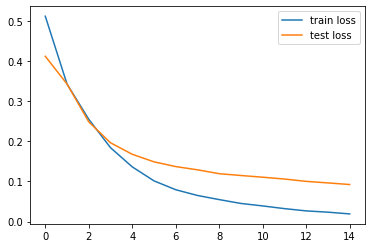

In [178]:
plt.plot(train_losses, label="train loss")
plt.plot(test_loss, label="test loss")
plt.legend()
plt.show()

In [179]:
n_correct = 0
n_total = 0
for inputs, targets in train_iter:
    inputs, targets = inputs.to(device), targets.to(device)
    targets = targets.view(-1, 1).float()

    outputs = model(inputs)
    predictions = (outputs > 0)
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]

train_acc = n_correct / n_total

n_correct = 0
n_total = 0
for inputs, targets in test_iter:
    inputs, targets = inputs.to(device), targets.to(device)
    targets = targets.view(-1, 1).float()

    predictions = model(inputs)
    predictions = (predictions > 0)
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]

test_acc = n_correct / n_total

print(f"train_acc: {train_acc:.4f}, test_acc: {test_acc:.4f}")

train_acc: 0.9969, test_acc: 0.9695
